# SD212: Graph mining
## Lab 2: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [33]:
from IPython.display import SVG

In [34]:
import numpy as np
from scipy import sparse

In [35]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [36]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [37]:
n = 10

In [38]:
dataset = linear_graph(n, True)
adjacency = dataset.adjacency
position = dataset.position

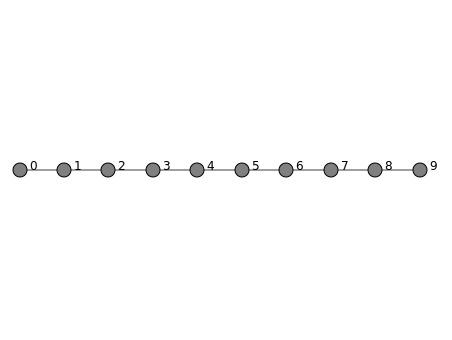

In [39]:
image = svg_graph(adjacency, position, names=np.arange(n))
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$? You need to compute it!

In [40]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [41]:
scores = pagerank.fit_transform(adjacency)


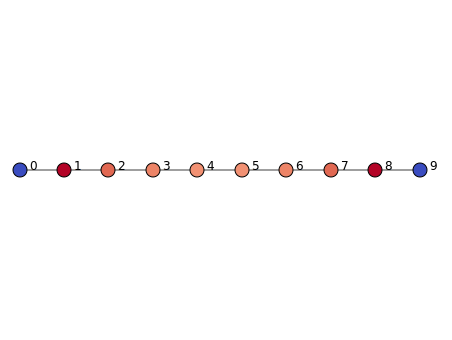

In [42]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)
SVG(image)

In [43]:
top_nodes = top_k(scores, k=2)

for i, node in enumerate(top_nodes):
    print(i + 1,"is" ,node)

1 is 1
2 is 8


In [44]:
d = adjacency.dot(np.ones((adjacency.shape[0])))
print("The exact PageRank vector when alpha = 1 is :")
print(d / d.sum())

The exact PageRank vector when alpha = 1 is :
[0.05555556 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.05555556]


## Les Misérables


In [45]:
dataset = miserables(True)

In [46]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

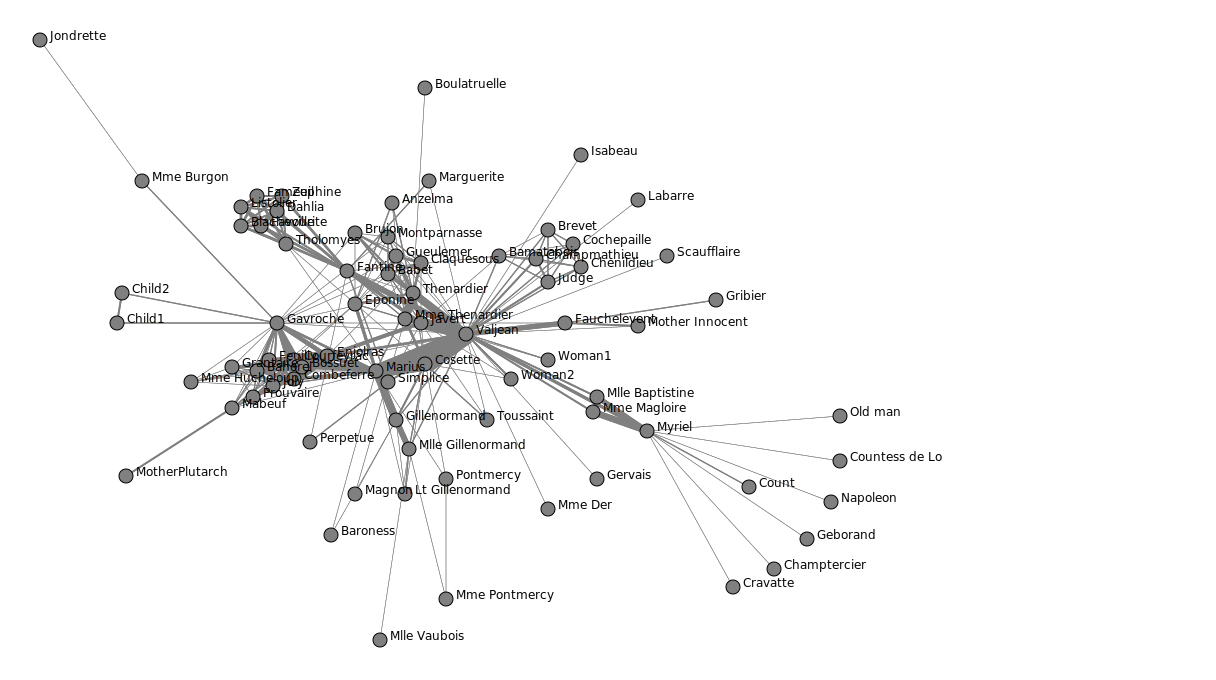

In [47]:
image = svg_graph(adjacency, position, names, scale=2)
SVG(image)

## To do

* Display the graph with PageRank scores.
* List the 10 best ranked characters.
* Compare with:
    1. the 10 nodes of highest degrees
    2. the 10 nodes of highest weights
* Try different values of $\alpha$ and interpret the results.

In [48]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [49]:
scores = pagerank.fit_transform(adjacency)

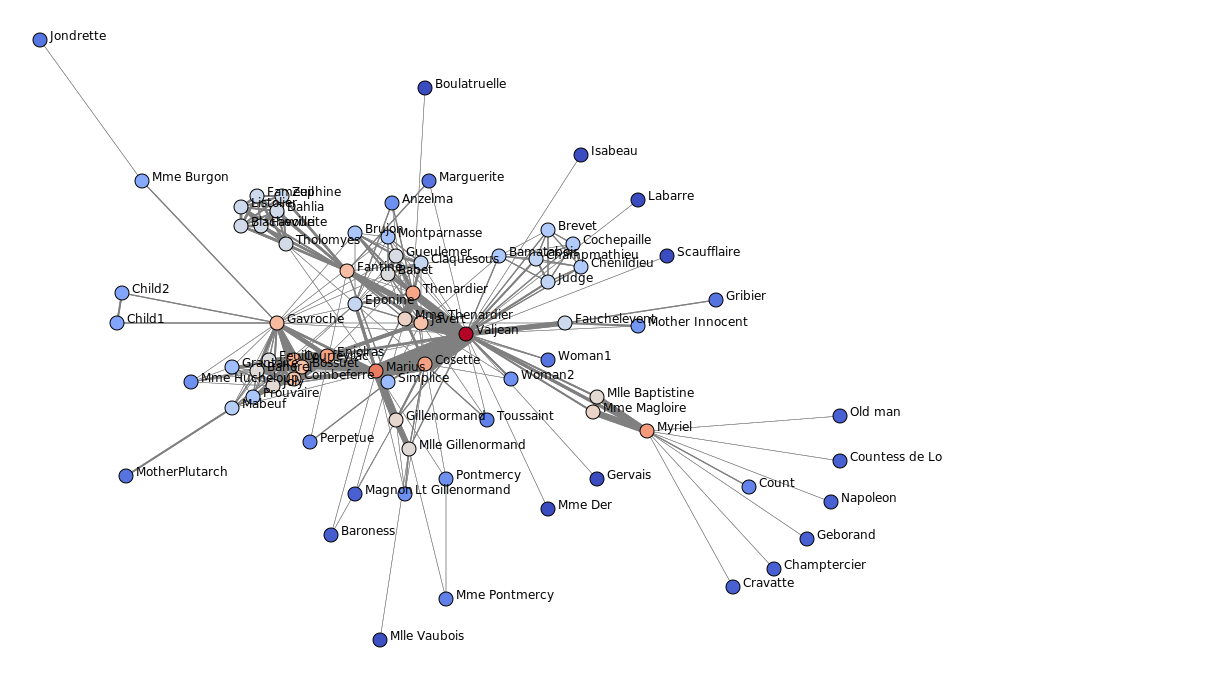

In [50]:
# scores in log scale appear more clearly
image = svg_graph(adjacency, position, names, scores=np.log(scores), scale=2)
SVG(image)

In [51]:
top_nodes = top_k(scores, 10)

In [52]:
print("The 10 nodes of highest degrees")
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

The 10 nodes of highest degrees
1 Valjean
2 Marius
3 Myriel
4 Cosette
5 Enjolras
6 Thenardier
7 Courfeyrac
8 Gavroche
9 Fantine
10 Javert


## Openflights


In [53]:
dataset = openflights

In [54]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

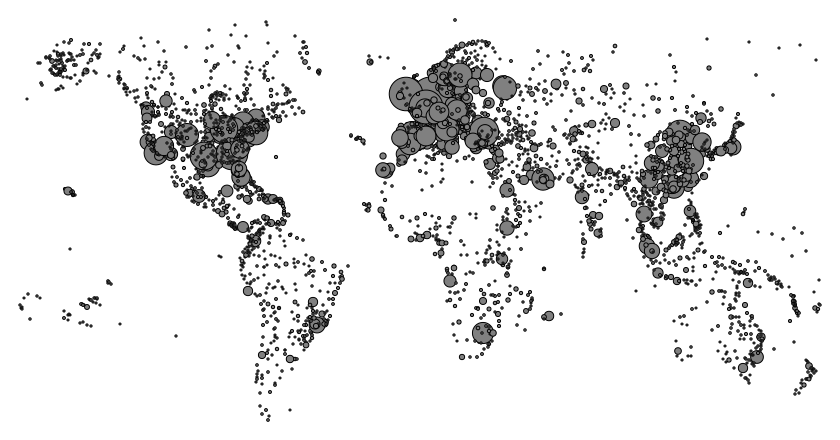

In [55]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

## To do

* Display the same world map with PageRank scores.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Display the world map with Personalized PageRank scores, starting from Tokyo international airport.
* List the corresponding 10 best ranked airports.

In [56]:
pagerank = PageRank()

In [57]:
scores = pagerank.fit_transform(adjacency)

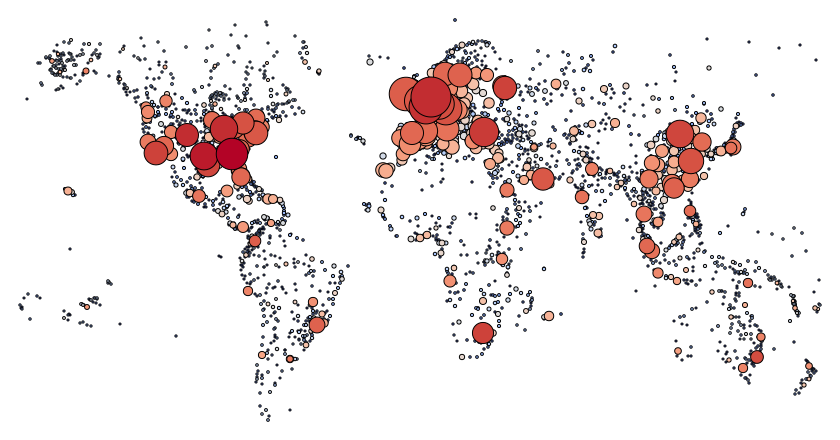

In [58]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), 
            width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [59]:
print("The 10 best ranked airports\n")

top_nodes = top_k(scores, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

print("\nThe 10 airports of highest traffic\n")
top_nodes = top_k(adjacency.dot(np.ones(adjacency.shape[0])), 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

The 10 best ranked airports

1 Hartsfield Jackson Atlanta International Airport
2 Dallas Fort Worth International Airport
3 Amsterdam Airport Schiphol
4 Chicago O'Hare International Airport
5 Denver International Airport
6 Charles de Gaulle International Airport
7 Atatürk International Airport
8 OR Tambo International Airport
9 Los Angeles International Airport
10 Domodedovo International Airport

The 10 airports of highest traffic

1 Amsterdam Airport Schiphol
2 Charles de Gaulle International Airport
3 Dublin Airport
4 Munich International Airport
5 Hartsfield Jackson Atlanta International Airport
6 London Gatwick Airport
7 Frankfurt am Main International Airport
8 Atatürk International Airport
9 Dallas Fort Worth International Airport
10 Beijing Capital International Airport


In [60]:
indices = np.where(np.char.find(names, 'Tokyo') != -1)
tokyo = names[indices]
print(tokyo)

['Tokyo Haneda International Airport']


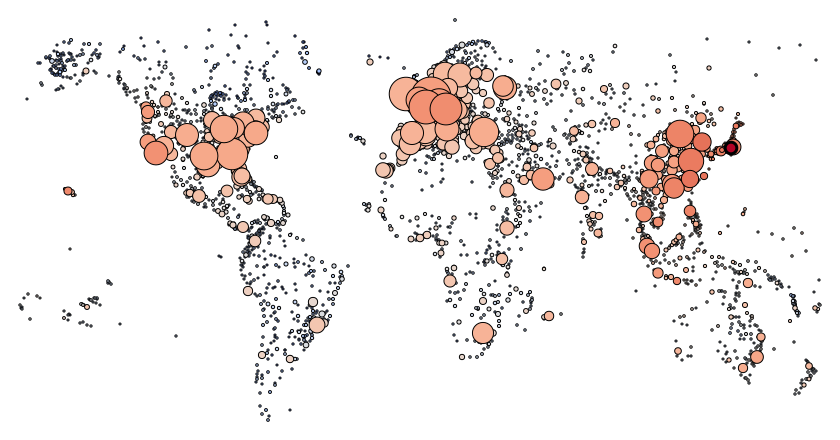

In [61]:
# Displaying the world map with Personalized PageRank scores, starting from Tokyo international airport.

weights = {
    indices[0][0]: 1
}

scores = pagerank.fit_transform(adjacency, weights)

image = svg_graph(adjacency, position, scores=np.log(scores),
                  width=800, height=400, display_node_weight=True,
                  display_edges=False, node_order=np.argsort(scores), seeds=weights)

SVG(image)


## 2. Directed graphs

## Wikipedia Vitals

In [62]:
dataset = wikivitals

In [63]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which articles of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [64]:
pagerank = PageRank()

scores = pagerank.fit_transform(adjacency)

top_nodes_rank = top_k(scores, 10)

print("The 10 most important pages\n")
for i, node in enumerate(top_nodes_rank):
    print(i + 1, names[node])

print("\nThe 10 pages of highest out degrees\n")
top_nodes_out = top_k(adjacency.dot(np.ones(adjacency.shape[0])), 10)
for i, node in enumerate(top_nodes_out):
    print(i + 1, names[node])

print("\nThe 10 pages of highest in degrees\n")
top_nodes_in = top_k(adjacency.T.dot(np.ones(adjacency.shape[0])), 10)
for i, node in enumerate(top_nodes_in):
    print(i + 1, names[node])

print("\nArticle of Wikipedia Vitals in the top-20 of PageRank but not in the top-20 in degrees\n")
top_nodes_rank = top_k(scores, 20)
top_nodes_in = top_k(adjacency.T.dot(np.ones(adjacency.shape[0])), 20)
articles = np.setdiff1d(top_nodes_rank, top_nodes_in)
for i, node in enumerate(articles):
    print(i + 1, names[node])



The 10 most important pages

1 United States
2 World War II
3 The New York Times
4 Geographic coordinate system
5 Latin
6 India
7 China
8 France
9 United Kingdom
10 World War I

The 10 pages of highest out degrees

1 Europe
2 Africa
3 History of art
4 France
5 Human history
6 Latin America
7 South America
8 Asia
9 Biology
10 Human

The 10 pages of highest in degrees

1 United States
2 The New York Times
3 World War II
4 India
5 China
6 France
7 Geographic coordinate system
8 United Kingdom
9 Latin
10 Australia

Article of Wikipedia Vitals in the top-20 of PageRank but not in the top-20 in degrees

1 Greek language


## To do

* List the 20 closest pages to **Picasso** in Wikipedia Vitals. Who is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.
* In both cases, propose a method to get the 20 closest pages **specifically** related to the target(s). <br>
**Hint:** Consider the difference between two PageRank scores.

In [65]:
print("The 20 closest pages to Picasso")
indices = np.where(np.char.find(names, 'Pablo Picasso') != -1)
picasso = indices[0][0]

scores = pagerank.fit_transform(adjacency, {picasso: 1})
print(names[picasso])
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

print("\nThen the best ranked painter other than Picasso is Paul Cézanne\n")

print("The 20 closest pages to both Cat and Dog in Wikipedia Vitals")
cat = 1497
dog = 2468

scores = pagerank.fit_transform(adjacency, {cat: 1, dog: 1})

top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

The 20 closest pages to Picasso
Pablo Picasso
1 Pablo Picasso
2 The New York Times
3 World War II
4 World War I
5 Paris
6 Modernism
7 Museum of Modern Art
8 Cubism
9 Romanticism
10 Impressionism
11 Metropolitan Museum of Art
12 Symbolism (arts)
13 Surrealism
14 Modern art
15 United States
16 Time (magazine)
17 Paul Cézanne
18 Vincent van Gogh
19 Post-Impressionism
20 Dada

Then the best ranked painter other than Picasso is Paul Cézanne

The 20 closest pages to both Cat and Dog in Wikipedia Vitals
1 Dog
2 Cat
3 Taxonomy (biology)
4 Animal
5 Mammal
6 Chordate
7 Latin
8 Carl Linnaeus
9 World War II
10 Carnivora
11 Pinniped
12 Lion
13 Leopard
14 Brown bear
15 Fox
16 Polar bear
17 Hyena
18 Coyote
19 Bear
20 Jaguar


## To do

* List 5 representative articles of each category.

In [66]:
labels = dataset.labels
names_labels = dataset.names_labels

pagerank = PageRank()

print("The 5 representative articles of each category")
for i, label in enumerate(names_labels):
    print(label)
    weights = {
        j: 1 for j in np.where(labels == i)[0]
    }
    scores = pagerank.fit_transform(adjacency, weights)
    top_nodes = top_k(scores, 5)
    for j, node in enumerate(top_nodes):
        print(j + 1, names[node])
    print()

The 5 representative articles of each category
Arts
1 The New York Times
2 World War II
3 United States
4 Latin
5 Geographic coordinate system

Biological and health sciences
1 Taxonomy (biology)
2 Animal
3 Latin
4 Chordate
5 United States

Everyday life
1 United States
2 The New York Times
3 World War II
4 United Kingdom
5 China

Geography
1 Geographic coordinate system
2 United States
3 China
4 World War II
5 France

History
1 World War II
2 United States
3 Geographic coordinate system
4 World War I
5 Roman Empire

Mathematics
1 Real number
2 Function (mathematics)
3 Complex number
4 Set (mathematics)
5 Integer

People
1 The New York Times
2 World War II
3 United States
4 France
5 India

Philosophy and religion
1 Christianity
2 Islam
3 Buddhism
4 Hinduism
5 Catholic Church

Physical sciences
1 Oxygen
2 Hydrogen
3 Earth
4 Kelvin
5 Density

Society and social sciences
1 United States
2 World War II
3 The New York Times
4 Latin
5 United Kingdom

Technology
1 United States
2 World War II

## 3. Bipartite graphs

## Cinema

In [67]:
dataset = cinema

In [68]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do


* List the 5 closest actors and the 5 closest movies to **Catherine Deneuve**.

In [69]:
indices = np.where(np.char.find(actors, 'Catherine Deneuve') != -1)
catherine = indices[0][0]
print(actors[catherine])

print("\nThe 5 closest movies to Catherine Deneuve")
scores = pagerank.fit_transform(biadjacency, {catherine: 1})
top_nodes = top_k(scores, 5)
for i, node in enumerate(top_nodes):
    print(i + 1, movies[node])

print("\nThe 5 closest actors to Catherine Deneuve")
scores = pagerank.fit_transform(biadjacency.T, {catherine: 1})
top_nodes = top_k(scores, 5)
for i, node in enumerate(top_nodes):
    print(i + 1, actors[node])

Catherine Deneuve

The 5 closest movies to Catherine Deneuve
1 A Son of David
2 The Lady Owner
3 The White Star
4 The Tidal Wave
5 A Dead Certainty

The 5 closest actors to Catherine Deneuve
1 Catherine Deneuve
2 Marcello Mastroianni
3 Gérard Depardieu
4 Michel Piccoli
5 Chiara Mastroianni


## 4. Directed graphs as bipartite graphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [70]:
dataset = wikivitals

In [71]:
adjacency = dataset.adjacency
names = dataset.names

## To do

Do the same experiments as above and compare both rankings:
* List the 10 best ranked pages of Wikipedia Vitals. 
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

# TP

In [72]:
# Undirected graph adjacency
adjacency = np.asarray([[0,1,1,0,1,1,0,0],
                        [1,0,1,0,1,1,0,0],
                        [1,1,0,0,1,1,0,0],
                        [0,0,0,0,1,0,1,0],
                        [1,1,1,1,0,1,1,1],
                        [1,1,1,0,1,0,1,1],
                        [0,0,0,1,1,1,0,1],
                        [0,0,0,0,1,1,1,0]])

# compute P = D^(-1)A where A is the adjacency and D is diag(d_i) where d_i is the sum of the row i
d = adjacency.dot(np.ones((adjacency.shape[0])))
print("d")
print(d)
print("d sum")
print(d.sum())
D = np.diag(d)
D = np.linalg.inv(D)
P = np.dot(D, adjacency)

piCalc = d / (d.sum())

print("piCalc")
print(piCalc)

piTest = np.zeros(8)
piTest[0] = 1

for i in range(100):
    piTest = piTest.dot(P)

print("piTest")
print(piTest)

# To CSR format
adjacency_csr = sparse.csr_matrix(adjacency)

pagerank = PageRank(damping_factor=0.9999999)

scores = pagerank.fit_transform(adjacency_csr)

print("Scores:")
print(scores)

d
[4. 4. 4. 2. 7. 6. 4. 3.]
d sum
34.0
piCalc
[0.11764706 0.11764706 0.11764706 0.05882353 0.20588235 0.17647059
 0.11764706 0.08823529]
piTest
[0.11764706 0.11764706 0.11764706 0.05882353 0.20588235 0.17647059
 0.11764706 0.08823529]
Scores:
[0.11764123 0.11764123 0.11764123 0.05887533 0.20583383 0.17647091
 0.1176111  0.08828514]


In [73]:
B = np.asarray([[1,1,1,1,1],
               [0,1,1,1,0],
               [0,1,0,1,0],
               [0,1,1,1,1],
               [0,0,0,0,1]])

# Creating the bi adjacency from B where A = [[0,B],[B.T,0]]
n, m = B.shape

adjacency_matrix = np.zeros((n + m, n + m))

adjacency_matrix[:n, n:] = B
adjacency_matrix[n:, :n] = B.T

print(adjacency_matrix)

adjacency_csr = sparse.csr_matrix(adjacency_matrix)
pagerank = PageRank(damping_factor=0.999999999)
scores = pagerank.fit_transform(adjacency_csr)
print(scores)
top_nodes = top_k(scores)
top_nodes

[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]
[0.16674246 0.09980917 0.06651097 0.13337328 0.03356412 0.03334962
 0.13324646 0.09997357 0.13324646 0.10018388]


array([0], dtype=int64)